In [1]:
#import libraries required for data analysis & modelling
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import price demand data
df_price = pd.read_csv('price_demand_data.csv')
df_price.tail()

,REGION,SETTLEMENTDATE,TOTALDEMAND,PRICECATEGORY
11659,VIC1,31/08/2021 22:00,4861.91,MEDIUM
11660,VIC1,31/08/2021 22:30,4748.74,MEDIUM
11661,VIC1,31/08/2021 23:00,4620.09,MEDIUM
11662,VIC1,31/08/2021 23:30,4834.00,MEDIUM
11663,VIC1,1/09/2021 0:00,4811.27,MEDIUM


In [3]:
#convert settlement date format
df_price['SETTLEMENTDATE'] = pd.to_datetime(df_price['SETTLEMENTDATE'],\
                       dayfirst = True).dt.date
df_price.tail()

,REGION,SETTLEMENTDATE,TOTALDEMAND,PRICECATEGORY
11659,VIC1,2021-08-31,4861.91,MEDIUM
11660,VIC1,2021-08-31,4748.74,MEDIUM
11661,VIC1,2021-08-31,4620.09,MEDIUM
11662,VIC1,2021-08-31,4834.00,MEDIUM
11663,VIC1,2021-09-01,4811.27,MEDIUM


In [4]:
#count occurence for each price category
df_price["PRICECATEGORY"].value_counts()

LOW        7570
MEDIUM     3061
HIGH        777
EXTREME     256
Name: PRICECATEGORY, dtype: int64

In [5]:
#assign value 0 to 3 to each price category
df_price['PRICECATEG'] = df_price['PRICECATEGORY'].replace(['LOW','MEDIUM','HIGH','EXTREME'],[0,1,2,3])
df_price['PRICECATEGORY'].value_counts()

LOW        7570
MEDIUM     3061
HIGH        777
EXTREME     256
Name: PRICECATEGORY, dtype: int64

In [6]:
#group price dataset by date and assign max price category
df_price_max = pd.DataFrame(df_price.groupby("SETTLEMENTDATE").PRICECATEG.max())
df_price_max.tail()

,PRICECATEG
SETTLEMENTDATE,
2021-08-28,1
2021-08-29,3
2021-08-30,2
2021-08-31,1
2021-09-01,1


In [7]:
#import weather data
df_weather = pd.read_csv('weather_data.csv')
df_weather.head()

,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),...,9am cloud amount (oktas),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
0,1/01/2021,15.6,29.9,0.0,2.8,9.3,NNE,31.0,13:14,19.2,...,6,N,2,1018.8,28.1,43,5.0,E,13,1015.3
1,2/01/2021,18.4,29.0,0.0,9.4,1.3,NNW,30.0,8:22,23.3,...,7,NNW,17,1013.3,28.7,38,7.0,SW,4,1008.5
2,3/01/2021,17.0,26.2,12.6,4.8,7.1,WSW,33.0,17:55,18.3,...,8,WSW,4,1007.7,23.5,59,4.0,SSW,2,1005.2
3,4/01/2021,16.0,18.6,2.6,3.8,0.0,SSE,41.0,16:03,16.2,...,8,SSE,11,1010.0,18.2,82,8.0,SSW,17,1011.0
4,5/01/2021,15.9,19.1,11.2,1.0,0.0,SSE,35.0,11:02,17.2,...,8,SSE,13,1012.5,18.2,82,8.0,SSE,19,1013.3


In [8]:
#convert date format so they align to price data
df_weather['Date'] = pd.to_datetime(df_weather['Date'],\
                       dayfirst = True).dt.date
df_weather.tail()

,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),...,9am cloud amount (oktas),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
238,2021-08-27,4.6,13.6,0.0,1.2,3.8,SSW,15.0,12:18,7.7,...,7,,Calm,1020.0,12.8,65,7.0,SSE,7,1017.4
239,2021-08-28,5.3,17.8,0.0,1.6,9.6,N,39.0,13:14,9.1,...,1,N,7,1018.6,17.4,31,3.0,NNW,24,1013.5
240,2021-08-29,9.1,16.2,0.6,6.4,4.3,NNE,33.0,1:50,10.6,...,7,N,13,1011.4,12.8,84,7.0,S,6,1010.4
241,2021-08-30,6.4,17.6,4.0,1.4,7.4,NNW,50.0,14:04,11.1,...,7,N,15,1016.1,16.8,45,1.0,NNW,28,1013.2
242,2021-08-31,11.0,20.1,0.0,5.8,3.6,N,61.0,16:29,13.5,...,7,N,17,NaN,19.4,43,6.0,N,30,1012.2


In [9]:
# merge the weather data with the price data
df = pd.merge(df_price_max, df_weather, left_on="SETTLEMENTDATE", right_on="Date")
df.tail()

,PRICECATEG,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,...,9am cloud amount (oktas),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
238,3,2021-08-27,4.6,13.6,0.0,1.2,3.8,SSW,15.0,12:18,...,7,,Calm,1020.0,12.8,65,7.0,SSE,7,1017.4
239,1,2021-08-28,5.3,17.8,0.0,1.6,9.6,N,39.0,13:14,...,1,N,7,1018.6,17.4,31,3.0,NNW,24,1013.5
240,3,2021-08-29,9.1,16.2,0.6,6.4,4.3,NNE,33.0,1:50,...,7,N,13,1011.4,12.8,84,7.0,S,6,1010.4
241,2,2021-08-30,6.4,17.6,4.0,1.4,7.4,NNW,50.0,14:04,...,7,N,15,1016.1,16.8,45,1.0,NNW,28,1013.2
242,1,2021-08-31,11.0,20.1,0.0,5.8,3.6,N,61.0,16:29,...,7,N,17,NaN,19.4,43,6.0,N,30,1012.2


In [10]:
#add features to the dataframe
df['Avg Temp'] = pd.DataFrame((df['Minimum temperature (°C)'] + df['Maximum temperature (°C)'])/2)
df['AvgdayTemp'] = pd.DataFrame((df['3pm Temperature (°C)'] + df['9am Temperature (°C)'])/2)
df['Avghumidity']= pd.DataFrame((df['9am relative humidity (%)'] + df['3pm relative humidity (%)'])/2)

In [11]:
#obtain dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 242
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   PRICECATEG                         243 non-null    int64  
 1   Date                               243 non-null    object 
 2   Minimum temperature (°C)           242 non-null    float64
 3   Maximum temperature (°C)           242 non-null    float64
 4   Rainfall (mm)                      241 non-null    float64
 5   Evaporation (mm)                   243 non-null    float64
 6   Sunshine (hours)                   243 non-null    float64
 7   Direction of maximum wind gust     240 non-null    object 
 8   Speed of maximum wind gust (km/h)  240 non-null    float64
 9   Time of maximum wind gust          240 non-null    object 
 10  9am Temperature (°C)               242 non-null    float64
 11  9am relative humidity (%)          242 non-null    float64

In [12]:
# display categorical columns
df[df.select_dtypes(include=['object']).columns]

,Date,Direction of maximum wind gust,Time of maximum wind gust,9am wind direction,9am wind speed (km/h),3pm wind direction,3pm wind speed (km/h)
0,2021-01-01,NNE,13:14,N,2,E,13
1,2021-01-02,NNW,8:22,NNW,17,SW,4
2,2021-01-03,WSW,17:55,WSW,4,SSW,2
3,2021-01-04,SSE,16:03,SSE,11,SSW,17
4,2021-01-05,SSE,11:02,SSE,13,SSE,19
...,...,...,...,...,...,...,...
238,2021-08-27,SSW,12:18,,Calm,SSE,7
239,2021-08-28,N,13:14,N,7,NNW,24
240,2021-08-29,NNE,1:50,N,13,S,6
241,2021-08-30,NNW,14:04,N,15,NNW,28


In [13]:
#Remove inconsistent data
df['9am wind speed (km/h)']= pd.to_numeric(df['9am wind speed (km/h)'], errors='coerce')
df['3pm wind speed (km/h)']= pd.to_numeric(df['3pm wind speed (km/h)'], errors='coerce')
df

,PRICECATEG,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,...,9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa),Avg Temp,AvgdayTemp,Avghumidity
0,0,2021-01-01,15.6,29.9,0.0,2.8,9.3,NNE,31.0,13:14,...,1018.8,28.1,43,5.0,E,13.0,1015.3,22.75,23.65,60.0
1,0,2021-01-02,18.4,29.0,0.0,9.4,1.3,NNW,30.0,8:22,...,1013.3,28.7,38,7.0,SW,4.0,1008.5,23.70,26.00,45.0
2,0,2021-01-03,17.0,26.2,12.6,4.8,7.1,WSW,33.0,17:55,...,1007.7,23.5,59,4.0,SSW,2.0,1005.2,21.60,20.90,79.5
3,0,2021-01-04,16.0,18.6,2.6,3.8,0.0,SSE,41.0,16:03,...,1010.0,18.2,82,8.0,SSW,17.0,1011.0,17.30,17.20,90.0
4,0,2021-01-05,15.9,19.1,11.2,1.0,0.0,SSE,35.0,11:02,...,1012.5,18.2,82,8.0,SSE,19.0,1013.3,17.50,17.70,89.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,3,2021-08-27,4.6,13.6,0.0,1.2,3.8,SSW,15.0,12:18,...,1020.0,12.8,65,7.0,SSE,7.0,1017.4,9.10,10.25,76.5
239,1,2021-08-28,5.3,17.8,0.0,1.6,9.6,N,39.0,13:14,...,1018.6,17.4,31,3.0,NNW,24.0,1013.5,11.55,13.25,55.5
240,3,2021-08-29,9.1,16.2,0.6,6.4,4.3,NNE,33.0,1:50,...,1011.4,12.8,84,7.0,S,6.0,1010.4,12.65,11.70,81.5
241,2,2021-08-30,6.4,17.6,4.0,1.4,7.4,NNW,50.0,14:04,...,1016.1,16.8,45,1.0,NNW,28.0,1013.2,12.00,13.95,57.5


In [14]:
# substitute missing values with the mean for numerical data
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

# substitute missing values with the mode for string data
cat_columns = df.select_dtypes(include=['object']).columns
df[cat_columns] = df[cat_columns].fillna(df[cat_columns].mode().iloc[0])

df

,PRICECATEG,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,...,9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa),Avg Temp,AvgdayTemp,Avghumidity
0,0,2021-01-01,15.6,29.9,0.0,2.8,9.3,NNE,31.0,13:14,...,1018.800000,28.1,43,5.0,E,13.0,1015.3,22.75,23.65,60.0
1,0,2021-01-02,18.4,29.0,0.0,9.4,1.3,NNW,30.0,8:22,...,1013.300000,28.7,38,7.0,SW,4.0,1008.5,23.70,26.00,45.0
2,0,2021-01-03,17.0,26.2,12.6,4.8,7.1,WSW,33.0,17:55,...,1007.700000,23.5,59,4.0,SSW,2.0,1005.2,21.60,20.90,79.5
3,0,2021-01-04,16.0,18.6,2.6,3.8,0.0,SSE,41.0,16:03,...,1010.000000,18.2,82,8.0,SSW,17.0,1011.0,17.30,17.20,90.0
4,0,2021-01-05,15.9,19.1,11.2,1.0,0.0,SSE,35.0,11:02,...,1012.500000,18.2,82,8.0,SSE,19.0,1013.3,17.50,17.70,89.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,3,2021-08-27,4.6,13.6,0.0,1.2,3.8,SSW,15.0,12:18,...,1020.000000,12.8,65,7.0,SSE,7.0,1017.4,9.10,10.25,76.5
239,1,2021-08-28,5.3,17.8,0.0,1.6,9.6,N,39.0,13:14,...,1018.600000,17.4,31,3.0,NNW,24.0,1013.5,11.55,13.25,55.5
240,3,2021-08-29,9.1,16.2,0.6,6.4,4.3,NNE,33.0,1:50,...,1011.400000,12.8,84,7.0,S,6.0,1010.4,12.65,11.70,81.5
241,2,2021-08-30,6.4,17.6,4.0,1.4,7.4,NNW,50.0,14:04,...,1016.100000,16.8,45,1.0,NNW,28.0,1013.2,12.00,13.95,57.5


In [15]:
#Produce correlation matrix
corr_matrix = df.corr()
corr_matrix['PRICECATEG'].sort_values(ascending=False)

PRICECATEG                           1.000000
9am relative humidity (%)            0.327642
Avghumidity                          0.315975
9am MSL pressure (hPa)               0.210109
3pm relative humidity (%)            0.200159
3pm MSL pressure (hPa)               0.180123
3pm cloud amount (oktas)             0.083996
Rainfall (mm)                        0.011632
9am wind speed (km/h)               -0.030331
9am cloud amount (oktas)            -0.125458
Speed of maximum wind gust (km/h)   -0.176574
3pm wind speed (km/h)               -0.198710
Sunshine (hours)                    -0.251258
Evaporation (mm)                    -0.488360
Maximum temperature (°C)            -0.514404
3pm Temperature (°C)                -0.519353
9am Temperature (°C)                -0.565200
AvgdayTemp                          -0.572619
Avg Temp                            -0.593829
Minimum temperature (°C)            -0.599024
Name: PRICECATEG, dtype: float64

<AxesSubplot:xlabel='Avg Temp', ylabel='PRICECATEG'>

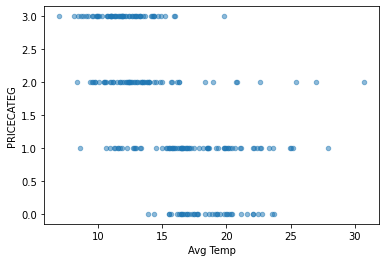

In [16]:
df.plot(kind="scatter", x="Avg Temp", y="PRICECATEG",alpha = 0.5)

<AxesSubplot:xlabel='Avg Temp', ylabel='Maximum temperature (°C)'>

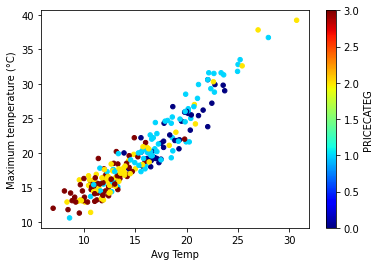

In [17]:
#scatter plot showing distribution of max price category
df.plot(kind="scatter", x="Avg Temp", y="Maximum temperature (°C)",alpha = 1,
    c="PRICECATEG", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)

In [18]:
X = df[['Avg Temp','AvgdayTemp','Avghumidity','Minimum temperature (°C)','Maximum temperature (°C)','Evaporation (mm)','Sunshine (hours)','9am Temperature (°C)','9am relative humidity (%)','3pm Temperature (°C)']]
X.head()

,Avg Temp,AvgdayTemp,Avghumidity,Minimum temperature (°C),Maximum temperature (°C),Evaporation (mm),Sunshine (hours),9am Temperature (°C),9am relative humidity (%),3pm Temperature (°C)
0,22.75,23.65,60.0,15.6,29.9,2.8,9.3,19.2,77.0,28.1
1,23.70,26.00,45.0,18.4,29.0,9.4,1.3,23.3,52.0,28.7
2,21.60,20.90,79.5,17.0,26.2,4.8,7.1,18.3,100.0,23.5
3,17.30,17.20,90.0,16.0,18.6,3.8,0.0,16.2,98.0,18.2
4,17.50,17.70,89.0,15.9,19.1,1.0,0.0,17.2,96.0,18.2


In [19]:
#Assign target to y for model 2
y = df['PRICECATEG']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: PRICECATEG, dtype: int64

In [20]:
#Model 2 - split dataset into training set and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=100)

In [21]:
#Model 2 - KNN nearest neighbour
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [22]:
#Test if KNN model is working
knn.predict(X_test)

array([1, 0, 3, 2, 1, 3, 2, 2, 1, 1, 3, 1, 2, 1, 3, 3, 1, 0, 0, 3, 0, 1,
       3, 1, 1, 1, 0, 3, 2, 3, 1, 1, 1, 1, 0, 1, 0, 3, 2, 0, 2, 2, 2, 2,
       1, 2, 0, 2, 1, 0, 0, 2, 3, 1, 1, 1, 1, 2, 0, 1, 1, 3, 2, 1, 0, 1,
       3, 1, 2, 2, 3, 1, 2, 2, 3, 2, 0, 1, 3, 3, 2, 0, 1, 2, 1, 1, 2, 3,
       3, 0, 3, 0, 1, 3, 2, 2, 1, 0])

In [23]:
#Obtain accuracy score of Model 2 Knn
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred1 = knn.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred1))

Accuracy:  0.45918367346938777


In [32]:
#This KNN model is having an accuracy of 47% where k fold is 10 and neighbours is 8.
from sklearn.model_selection import KFold
from sklearn import neighbors
from sklearn import preprocessing
from sklearn import metrics
k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)
neighbour_accuracy=[]
for neighbours in range(1,10):
    accuracy_scores=[]
    for train_index, test_index in kf.split(df):
        #print(train_index, test_index)
        X_train = X.iloc[train_index, :]
        X_test = X.iloc[test_index, :]

        y_train = y[train_index]
        y_test = y[test_index]

        scaler = preprocessing.StandardScaler().fit(X_train)
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)

        knn = neighbors.KNeighborsClassifier(n_neighbors=neighbours)
        knn.fit(X_train, y_train)

        predictions = knn.predict(X_test)
        accuracy_scores.append(accuracy_score(y_test, predictions))
    neighbour_accuracy.append(sum(accuracy_scores)/k)

print(neighbour_accuracy)

[0.4691666666666666, 0.4243333333333334, 0.42800000000000005, 0.4573333333333333, 0.4411666666666667, 0.4198333333333334, 0.43616666666666665, 0.43166666666666664, 0.4488333333333333]


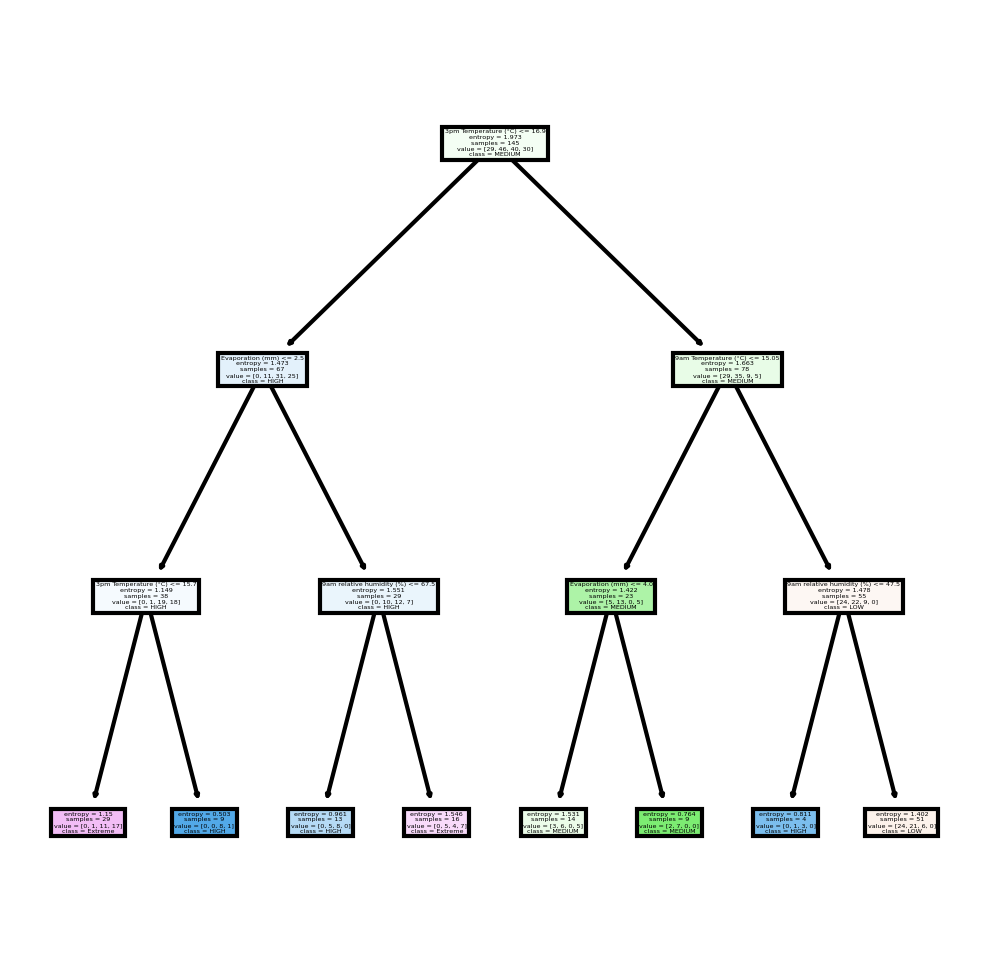

In [25]:
#Model 2 - Decision Tree
X = df[['Minimum temperature (°C)','Maximum temperature (°C)','Evaporation (mm)','Sunshine (hours)','9am Temperature (°C)','9am relative humidity (%)','3pm Temperature (°C)']]
y = df['PRICECATEG']

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy',random_state=1, max_depth=3)
dt.fit(X_train, y_train)
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(dt.fit(X_train, y_train),
           feature_names = X.columns, 
           class_names=['LOW','MEDIUM','HIGH', 'Extreme'],
           filled = True);

In [26]:
#Test if Decision Tree model is working
dt.predict(X_test)

array([1, 0, 3, 2, 2, 3, 3, 3, 3, 0, 3, 0, 1, 1, 3, 3, 1, 0, 0, 3, 0, 1,
       3, 1, 1, 3, 0, 3, 2, 3, 0, 3, 0, 1, 0, 0, 1, 2, 3, 0, 3, 1, 3, 3,
       0, 2, 0, 2, 0, 0, 0, 2, 3, 1, 2, 1, 0, 3, 1, 0, 0, 3, 2, 2, 0, 0,
       3, 0, 3, 3, 3, 0, 1, 2, 3, 2, 0, 1, 3, 3, 2, 0, 0, 3, 3, 0, 1, 3,
       3, 0, 3, 0, 1, 3, 3, 3, 3, 1])

In [27]:
#print accuracy score for Model 2 - Decision Tree
y_pred2 = dt.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred2))

Accuracy:  0.4897959183673469


In [28]:
#confusion matrix for decision tree
confusion_matrix(y_test, y_pred2)

array([[12,  1,  0,  0],
       [14,  9,  3,  4],
       [ 3,  4,  4, 10],
       [ 1,  4,  6, 23]])

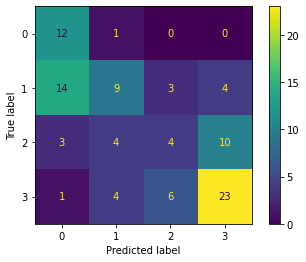

In [29]:
#plot confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dt, X_test, y_test)
plt.show()